In [1]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import ERROR
import CONFIG
import DBPARSE
from PXPY import *
from ASYMMETRY import *
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
import CORRECTIONS
import CALCULATE
import GETFF
from joblib import Parallel, delayed
import importlib
#importlib.reload(ASYMMETRY)

Welcome to JupyROOT 6.26/06


In [2]:
muN=-1.913

In [3]:
import pandas as pd

def load_data(file_path):
    """
    Load the data from the given file path into a pandas DataFrame.
    """
    columns = [
        "Q2", "GEn/GD", "dGEn/GD", "dGEn_Par/GD", "GMn/mu_n/GD", "dGMn/mu_n/GD", "dGMn_Par/mu_n/GD"
    ]
    data = pd.read_csv(file_path, delim_whitespace=True, comment='#', names=columns)
    return data

def find_closest_row(data, input_Q2):
    """
    Find the row in the data with the Q2 value closest to the input_Q2.
    """
    closest_row = data.iloc[(data['Q2'] - input_Q2).abs().argmin()]
    return closest_row

def get_GMn_value(input_Q2):
    """
    Load the data and return the GMn/mu_n/GD value for the closest Q2.
    """
    file_path='../DB/neutron_lookup.dat'
    data = load_data(file_path)
    closest_row = find_closest_row(data, input_Q2)
    return closest_row["GMn/mu_n/GD"],closest_row["dGMn/mu_n/GD"]
def get_GEn_value(input_Q2):
    """
    Load the data and return the GMn/mu_n/GD value for the closest Q2.
    """
    file_path='../DB/neutron_lookup.dat'
    data = load_data(file_path)
    closest_row = find_closest_row(data, input_Q2)
    return closest_row["GEn/GD"]
def Dipole(Q2):
    return (1+Q2/.71)**-2

In [4]:
q2t=np.linspace(0,10,1000)
genfit=np.empty(0)

for i in range(0,len(q2t)):
    genfit=np.append(genfit,get_GEn_value(q2t[i])*Dipole(q2t[i]))

In [5]:
GEN2 = {}
with open("kin2results.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2[key] = float(value)
GEN2Method1 = {}
with open("kin2resultsMETHOD1.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2Method1[key] = float(value)
GEN2Method2 = {}
with open("kin2resultsMETHOD2.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2Method2[key] = float(value)
GEN2Method3 = {}
with open("kin2resultsMETHOD3.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2Method3[key] = float(value)
GEN2Method4 = {}
with open("kin2resultsMETHOD4.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN2Method4[key] = float(value)

# Example: make a "single point" plot with error bars
#################################################kin3
GEN3 = {}
with open("kin3results.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3[key] = float(value)
GEN3Method1 = {}
with open("kin3resultsFIT1.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method1[key] = float(value)
GEN3Method2 = {}
with open("kin3resultsFIT2.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method2[key] = float(value)
GEN3Method3 = {}
with open("kin3resultsFIT3.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method3[key] = float(value)        
GEN3Method4 = {}
with open("kin3resultsFIT4.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method4[key] = float(value)
GEN3Method5 = {}
with open("kin3resultsFIT5.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method5[key] = float(value)  
GEN3Method6 = {}
with open("kin3resultsFIT6.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN3Method6[key] = float(value) 
 #################################################kin3       
# Example: make a "single point" plot with error bars

GEN4 = {}
with open("kin4combinedresults.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4[key] = float(value)
GEN4Method1 = {}
with open("kin4combinedresultsFIT1.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method1[key] = float(value)
GEN4Method2 = {}
with open("kin4combinedresultsFIT2.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method2[key] = float(value)
GEN4Method3 = {}
with open("kin4combinedresultsFIT3.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method3[key] = float(value)
GEN4Method4 = {}
with open("kin4combinedresultsFIT4.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method4[key] = float(value)
GEN4Method5 = {}
with open("kin4combinedresultsFIT5.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method5[key] = float(value)

GEN4Method6 = {}
with open("kin4combinedresultsMETHOD6.txt") as f:
    for line in f:
        key, value = line.strip().split(",")
        GEN4Method6[key] = float(value)
 #Example: make a "single point" plot with error bars






In [6]:
#seankin4
Sk4=muN* (-0.5127) 
Sk4stat=abs(muN*0.2629)
Sk4sys=abs(muN*.0552)

Sk2=muN*(-0.1952) 
Sk2stat=abs(muN*0.0194)
Sk2sys=abs(muN*0.0130)

Sk3=muN*(-.3527)
Sk3stat=abs(muN*(.1026))
Sk3sys=abs(muN*(.0262))

seanrelkin2=(Sk2stat**2+Sk2sys**2)**(1/2)/Sk2
seanrelkin3=(Sk3stat**2+Sk3sys**2)**(1/2)/Sk3
seanrelkin4=(Sk4stat**2+Sk4sys**2)**(1/2)/Sk4


In [7]:
relkin2=(GEN2["GE/GM_stat_error"]**2+GEN2["GE/GM_sys_error"]**2)**(1/2)/GEN2["GE/GM * muN"]
relkin3=(GEN3["GE/GM_stat_error"]**2+GEN3["GE/GM_sys_error"]**2)**(1/2)/GEN3["GE/GM * muN"]
relkin4=(GEN4["GE/GM_stat_error"]**2+GEN4["GE/GM_sys_error"]**2)**(1/2)/GEN4["GE/GM * muN"]

print(relkin2,relkin3,relkin4)

0.10084433838212971 0.15869363135641743 0.3269981152716169


In [8]:
relkin2/seanrelkin2

relkin3/seanrelkin3

relkin4/seanrelkin4

0.6240938788743713

In [9]:
GEN4["GE/GM_stat_error"]

0.3282

In [10]:
relkin4/seanrelkin4

0.6240938788743713

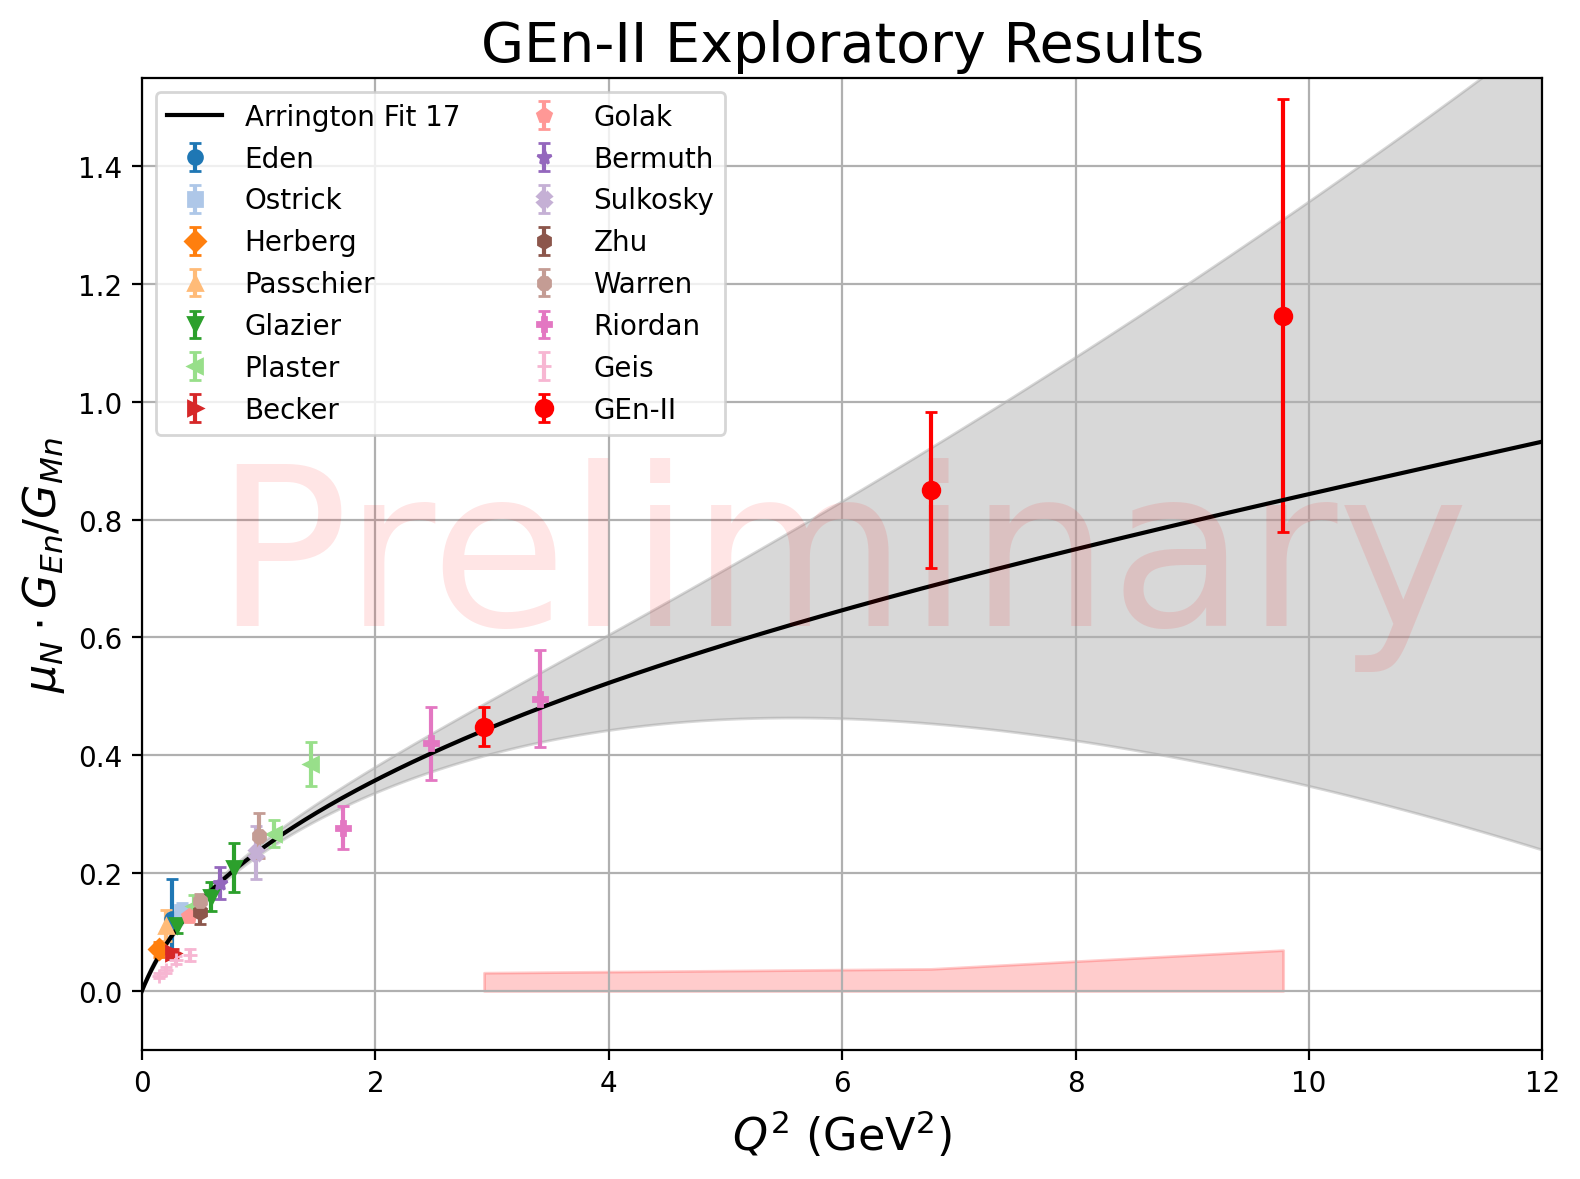

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GETFF import Function_GETFF  # Assuming you have this imported somewhere

# Load theory Q2 and GEn/GD ratio
GEntheory = np.transpose(np.loadtxt('../DB/neutron_lookup.dat'))
Q2t = np.sort(GEntheory[0])

# Calculate GE/GM and uncertainties using GETFF
GEGD, GEGDE, GMGD, GMGDE = [], [], [], []
for q2 in Q2t:
    GEGD.append(Function_GETFF(3, q2)[0])
    GEGDE.append(Function_GETFF(3, q2)[1])
    GMGD.append(Function_GETFF(4, q2)[0])
    GMGDE.append(Function_GETFF(4, q2)[1])

GEGD = np.array(GEGD)
GEGDE = np.array(GEGDE)
GMGD = np.array(GMGD)
GMGDE = np.array(GMGDE)

# Error propagation: GE/GM with uncertainty
def eprop(GE, GEE, GM, GMM):
    R = GE / GM
    fractional_error = np.sqrt((GEE / GE)**2 + (GMM / GM)**2)
    return R, R * fractional_error

RatFit, RatFitE = eprop(GEGD, GEGDE, GMGD, GMGDE)

# Load world data
df = pd.read_csv("../DB/GEn_World_Data.csv")
mu_n = 1.913

# Setup plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
from matplotlib.cm import get_cmap

# Watermark and labels
ax.text(0.5, 0.5, 'Preliminary', fontsize=80, color='red',
        ha='center', va='center', alpha=0.1, transform=ax.transAxes)
experiments = df["Experiment"].unique()

# Use a bright, qualitative colormap
cmap = get_cmap("tab20")  # or try "Set1" or "tab10"

colors = {exp: cmap(i % cmap.N) for i, exp in enumerate(experiments)}
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', '8', 'P', '+', 'x', '|', '_']
markers = {exp: marker_styles[i % len(marker_styles)] for i, exp in enumerate(experiments)}

# Plot world data with bright colors
for exp in experiments:
    subset = df[df["Experiment"] == exp]
    ax.errorbar(subset["Q2"], mu_n * subset["GEn"] / subset["GMn"],
                subset["RatE"], fmt=markers[exp], color=colors[exp],
                label=exp, markersize=5, capsize=2)
    
#plt.errorbar(GEN4["Q2"], Sk4, yerr=(Sk4sys**2+Sk4stat**2)**(1/2),
#             fmt='o', color='blue',capsize=2,label="Jeffas")
#plt.errorbar(GEN3["Q2"], Sk3, yerr=(Sk3sys**2+Sk3stat**2)**(1/2),
#             fmt='o', color='blue',capsize=2)  
#plt.errorbar(GEN2["Q2"], Sk2, yerr=(Sk2sys**2+Sk2stat**2)**(1/2),
#             fmt='o', color='blue',capsize=2)


#seans
"""plt.errorbar(GEN4["Q2"]+.2, Sk4, yerr=(Sk4stat),
             fmt='o', color='blue',capsize=2,label="Jeffas")
plt.errorbar(GEN3["Q2"]+.2, Sk3, yerr=(Sk3stat),
             fmt='o', color='blue',capsize=2)  
plt.errorbar(GEN2["Q2"]+.2, Sk2, yerr=(Sk2stat),
             fmt='o', color='blue',capsize=2)
"""



"""plt.errorbar(GEN4["Q2"], 0, yerr=(Sk4sys),
             fmt='o', color='blue',capsize=2)
plt.errorbar(GEN3["Q2"], 0, yerr=(Sk3sys),
             fmt='o', color='blue',capsize=2)  
plt.errorbar(GEN2["Q2"], 0, yerr=(Sk2sys),
             fmt='o', color='blue',capsize=2)"""

#plt.errorbar(GEN2["Q2"], GEN2["GE/GM * muN"], yerr=(GEN2["GE/GM_stat_error"]**2+GEN2["GE/GM_sys_error"]**2)**(1/2),
 #            fmt='o', color='red', label='GEn-II',capsize=2)
#plt.errorbar(GEN3["Q2"], GEN3["GE/GM * muN"], yerr=(GEN3["GE/GM_stat_error"]**2+GEN3["GE/GM_sys_error"]**2)**(1/2),
#             fmt='o', color='red',capsize=2)
#plt.errorbar(GEN4["Q2"]-.02, GEN4["GE/GM * muN"], yerr=(GEN4["GE/GM_stat_error"]**2+GEN4["GE/GM_sys_error"]**2)**(1/2),
#             fmt='o', color='red',capsize=2,alpha=1)

#MYRESULT
plt.errorbar(GEN2["Q2"], GEN2["GE/GM * muN"], yerr=(GEN2["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,label="GEn-II")
plt.errorbar(GEN3Method5["Q2"], GEN3Method5["GE/GM * muN"], yerr=(GEN3Method5["GE/GM_stat_error"]),
            fmt='o', color='red',capsize=2)
plt.errorbar(GEN4Method5["Q2"], GEN4Method5["GE/GM * muN"], yerr=(GEN4Method5["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,alpha=1)

"""plt.errorbar(GEN4Method5["Q2"]-.2, GEN4Method5["GE/GM * muN"], yerr=(.0938),
              color='yellow',capsize=2,label="ERR")
plt.errorbar(GEN3Method5["Q2"]-.2, GEN3Method5["GE/GM * muN"], yerr=(.0769),
              color='yellow',capsize=2) """ 
#zerod out
"""plt.errorbar(GEN2["Q2"], 0, yerr=(GEN2["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,label="GEn-II")
plt.errorbar(GEN3Method5["Q2"], 0, yerr=(GEN3Method5["GE/GM_stat_error"]),
            fmt='o', color='red',capsize=2)
plt.errorbar(GEN4Method5["Q2"], 0, yerr=(GEN4Method5["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,alpha=1)"""
"""plt.errorbar(GEN4Method5["Q2"]-.2,0, yerr=(.0938),
              color='blue',capsize=2,label="ERR")
plt.errorbar(GEN3Method5["Q2"]-.2, 0, yerr=(.0769),
              color='blue',capsize=2)  
"""






"""
plt.errorbar(GEN2["Q2"], 0, yerr=(GEN2["GE/GM_sys_error"]),
            color='red',capsize=2)
plt.errorbar(GEN3["Q2"], 0, yerr=(GEN3["GE/GM_sys_error"]),
            color='red',capsize=2)
plt.errorbar(GEN4["Q2"], 0, yerr=(GEN4["GE/GM_sys_error"]),
            color='red',capsize=2,alpha=1)"""

q_vals = np.array([
    GEN2["Q2"],
    GEN3["Q2"],
    GEN4["Q2"]
])

central_vals = np.array([
    0,
    0,
   0
])

sys_errs = np.array([
    Sk2sys,
    Sk3sys,
    Sk4sys
])
#plt.fill_between(q_vals,
#                 central_vals ,
#                 central_vals +   sys_errs,
#                 color='blue', alpha=0.2)

sys_errs = np.array([
    GEN2["GE/GM_sys_error"],
    GEN3Method5["GE/GM_sys_error"],
    GEN4Method5["GE/GM_sys_error"]
])
q_vals = np.array([
    GEN2["Q2"],
    GEN3["Q2"],
    GEN4["Q2"]
])
# Fill between ± half the systematic uncertainty
plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errs,
                 color='red', alpha=0.2)



# Plot fit and shaded error band
ax.plot(Q2t, RatFit, color='black', label='Arrington Fit 17')
ax.fill_between(Q2t, RatFit - RatFitE, RatFit + RatFitE, color='gray', alpha=0.3)


ax.set_xlim(0, 12)
ax.set_ylim(-0.1, 1.55)
ax.grid(True)
ax.set_xlabel('$Q^2$ (GeV$^2$)', fontsize=16)
ax.set_ylabel(r'$\mu_N \cdot G_{En} / G_{Mn}$', fontsize=16)
ax.set_title('GEn-II Exploratory Results', fontsize=20)
ax.legend(loc='upper left', fontsize=10, ncol=2)
#plt.yscale("log")
plt.tight_layout()
plt.savefig("PrelimResults.pdf")
plt.show()


In [12]:
import numpy as np

def GetTau(Q2):
    M_n = 0.939  # Nucleon mass in GeV
    return Q2 / (4 * M_n**2)

def GEGMpQCD(Q2, lambd=0.3):
    mu_n = -1.91  # Neutron magnetic moment in nuclear magnetons
    tau = GetTau(Q2)
    lambda2 = lambd**2
    beta = 11 - 2*(6)/3  # Nf=6
    # power = 2 + 8/(9*beta)  # theoretically derived
    power = 2  # hardcoded override as in original

    log_term = np.log(Q2 / lambda2)
    log_pow = np.power(log_term, power)
    
    pqcd_nom = Q2 - tau * log_pow
    pqcd_denom = Q2 + log_pow
    ratio = mu_n * pqcd_nom / pqcd_denom
    return ratio


In [37]:
diehlq=np.transpose(np.array(diehlhunter))[0]
diehlval=np.transpose(np.array(diehlhunter))[1]

In [38]:
diehlval

array([0.        , 0.29100956, 0.39274454, 0.48501576, 0.57965298,
       0.65772879, 0.7287067 , 0.78785497, 0.83280757, 0.86119876,
       0.87302841, 0.86593065, 0.85883288, 0.83517358, 0.81624603,
       0.79968462, 0.78075707, 0.75946377, 0.74290223, 0.73343846,
       0.72160881])

/tmp/ipykernel_5311/514293522.py:15: RuntimeWarning: divide by zero encountered in log
  log_term = np.log(Q2 / lambda2)
/tmp/ipykernel_5311/514293522.py:18: RuntimeWarning: invalid value encountered in scalar multiply
  pqcd_nom = Q2 - tau * log_pow


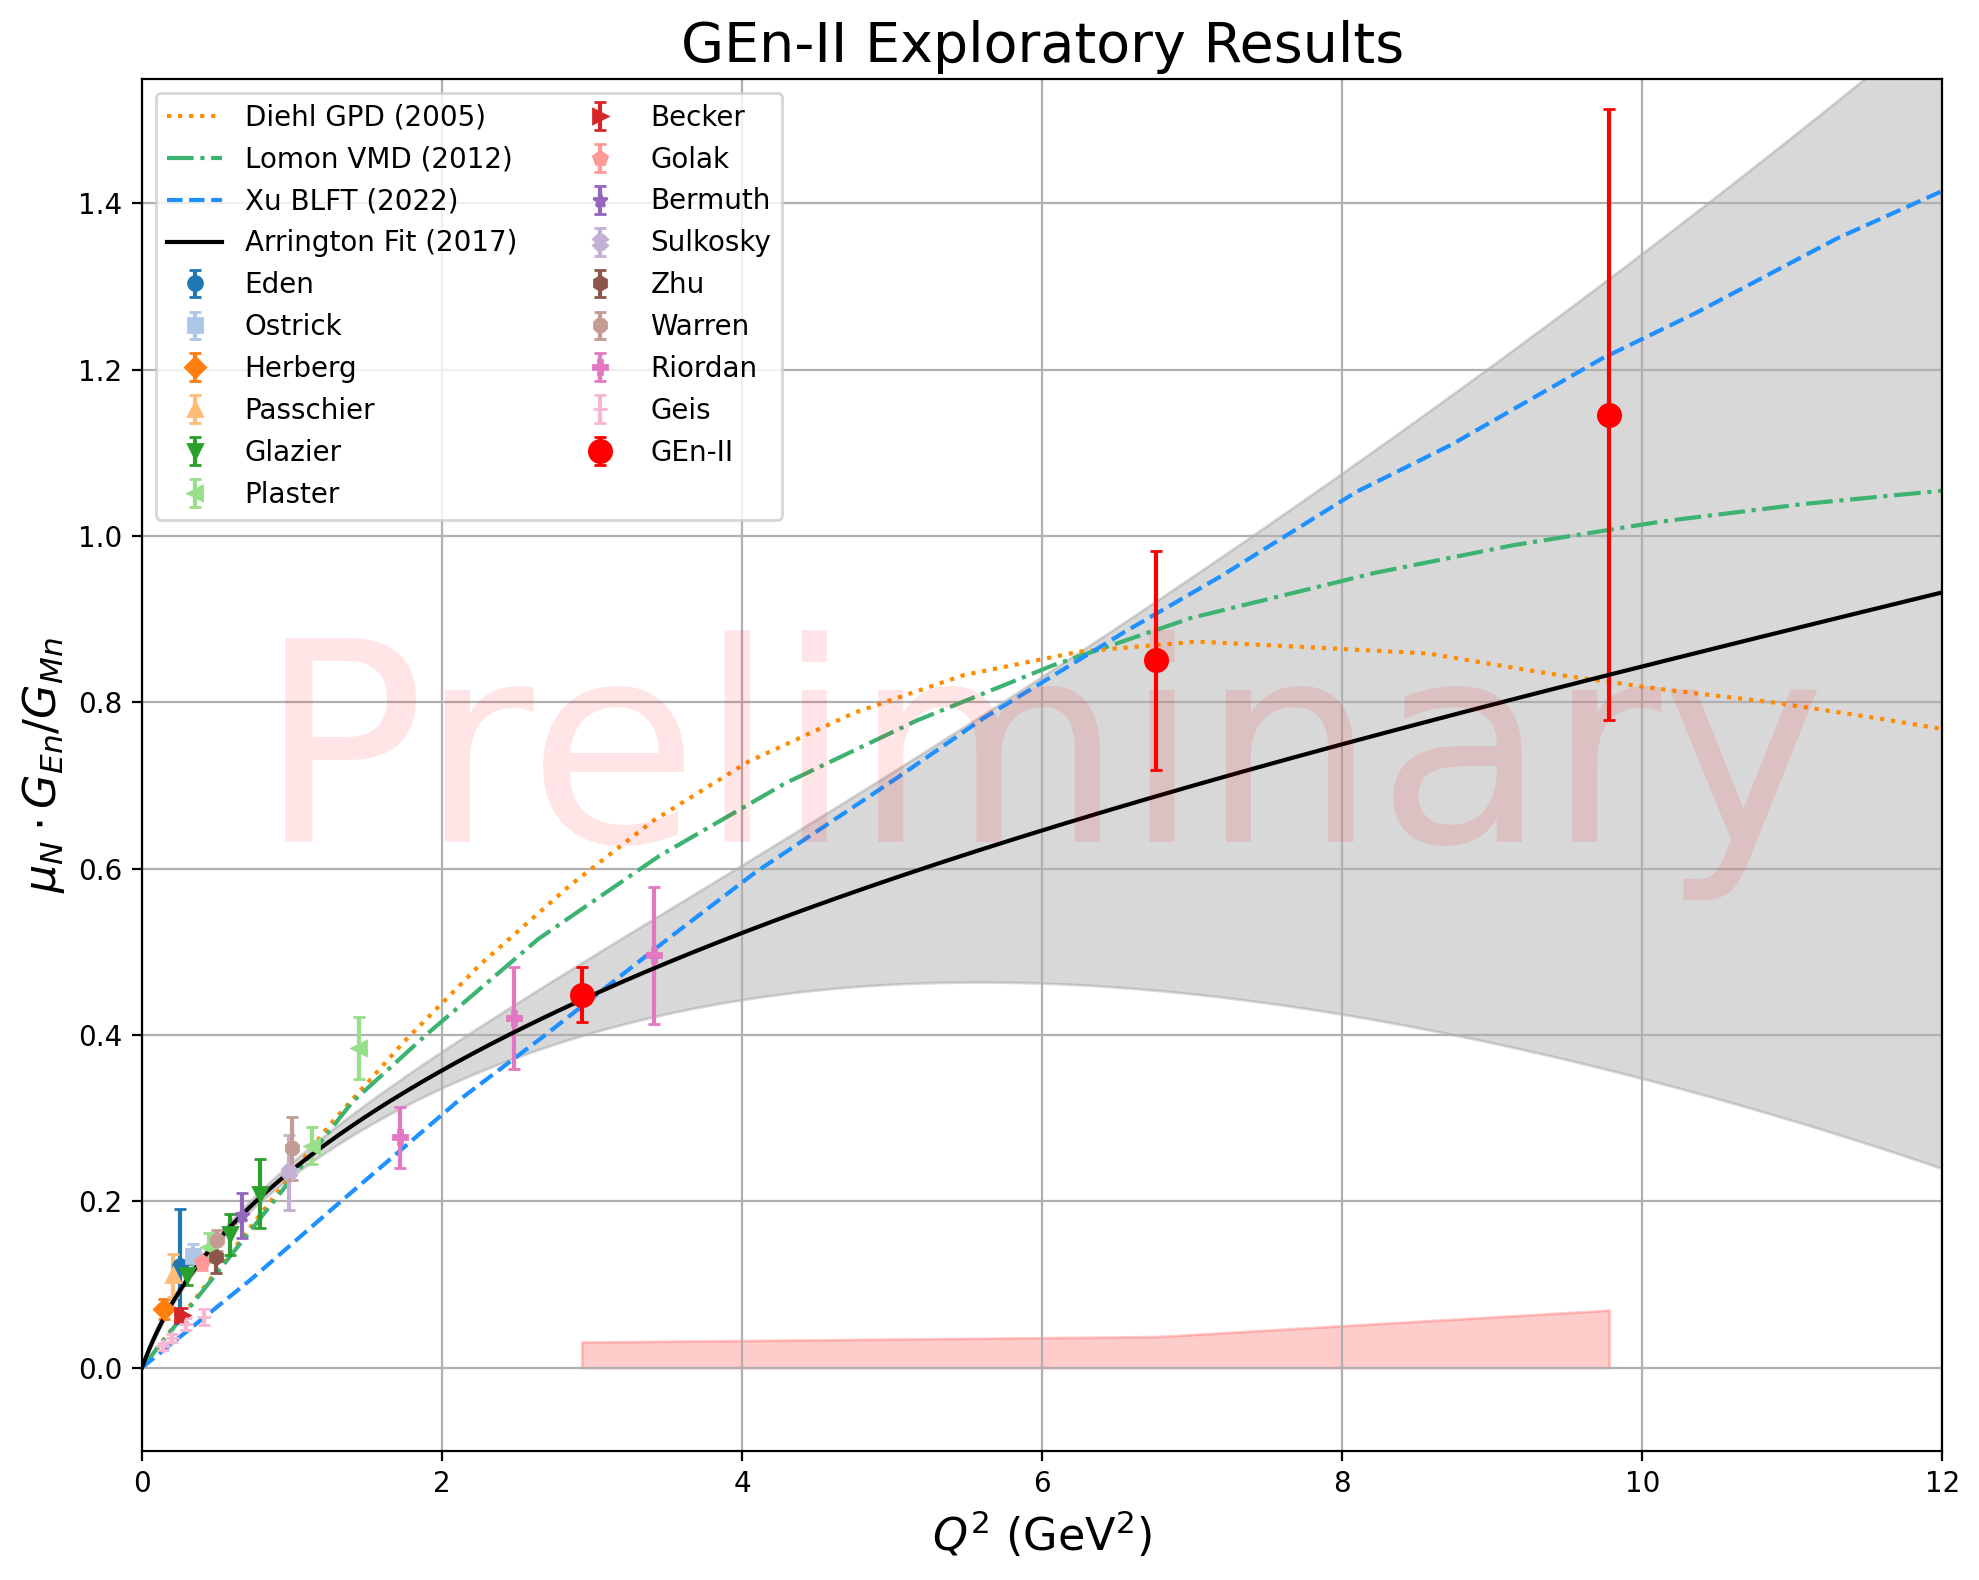

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8), dpi=200)
from matplotlib.cm import get_cmap
# Digitized pixel values
segovia_pix = [972, 910, 854, 810, 766, 724, 690, 660, 640, 620, 610, 605, 600, 605, 610, 620, 640, 660, 690, 724, 766, 810, 854, 910, 972]
diehl_pix   = [972, 890, 830, 775, 720, 666, 620, 580, 550, 520, 500, 485, 470, 466, 466, 466, 470, 480, 487, 492, 500, 510, 520, 530, 534, 540, 544, 546, 550, 550]
xu_pix      = [972, 934, 890, 840, 800, 754, 710, 670, 630, 596, 560, 526, 490, 460, 426, 390, 360, 330, 300, 270, 247, 218, 190, 165, 136, 114, 90]
lomon_pix   = [972, 890, 830, 775, 730, 685, 646, 610, 580, 550, 520, 500, 480, 460, 445, 430, 416, 404, 396, 390, 380, 370, 364, 360, 354, 348, 342, 337, 333, 330]
#gross_pix   = [972, 896, 830, 775, 750, 736, 707, 693, 680, 673, 666, 660, 660]

diehlhunter=[[0,0],
[1.2467654192133477, 0.2910095585567278],
[1.7513528430139278, 0.3927445445126911],
[2.2559402668145077, 0.48501575589159024],
[2.851094038263437, 0.5796529765533639],
[3.4074328402725387, 0.6577287886211008],
[4.041401581161296, 0.7287067041174311],
[4.752998825146273, 0.7878549670310397],
[5.47753391368338, 0.832807568079052],
[6.2538218162124455, 0.8611987605330275],
[7.030109718741511, 0.8730284131157492],
[7.819336901606144, 0.8659306478215596],
[8.569747679247511, 0.85883288252737],
[9.358973426328708, 0.8351735773619265],
[10.109385639753512, 0.8162460282077982],
[10.885673542282579, 0.7996846196137615],
[11.571395097163293, 0.780757070459633],
[12.28299234114827, 0.7594637745770642],
[13.03340311878964, 0.7429022347058104],
[13.783815332214443, 0.7334384601287463],
[14.508350420751551, 0.7216088075460245]]

lomonhunter=[[0,0],
[1.4020231432975045, 0.31940061973348627],
[1.906609849206366, 0.40220818781253825],
[2.6440842180790405, 0.5157729576284403],
[3.4462478097123665, 0.6151419343015291],
[4.287226370785521, 0.7026813896691132],
[5.167019901298503, 0.7783911924539755],
[6.072689120915746, 0.8446372206617737],
[6.99129618508512, 0.9014196055697248],
[8.220418697422808, 0.9558359811948012],
[9.139025761592181, 0.9889590609373088],
[10.122323484305642, 1.0173501877526758],
[11.079745517914844, 1.0386435492738533],
[12.037167551524046, 1.055205089145107],
[13.020465274237509, 1.0694006197334862],
[13.952010182959013, 1.0764984506662845]]

xuhunter=[[0,0],
[0.7292401508606373, 0.10646687324449541],
[1.2726418262093269, 0.19164045060642199],
[2.1136196693907627, 0.32176662901636083],
[2.6699599071833013, 0.3974764318012232],
[3.5238763128085857, 0.5181388356340978],
[4.093154395153254, 0.5962145164246178],
[5.037638584210326, 0.7097791549633028],
[5.606915230771557, 0.780757070459633],
[6.551399419828629, 0.8848580656984709],
[7.1853681607173865, 0.9511040939062692],
[8.09103738033463, 1.052839145500841],
[8.725006121223387, 1.1096214647701834],
[9.734179533041111, 1.213722394370413],
[10.355210429377738, 1.268138835634098],
[11.299693182651371, 1.3580441690073395],
[11.998352582084218, 1.414826488276682]]        
         
diehlq=np.transpose(np.array(diehlhunter))[0]
diehlval=np.transpose(np.array(diehlhunter))[1]

lomonq=np.transpose(np.array(lomonhunter))[0]
lomonval=np.transpose(np.array(lomonhunter))[1]

xuq=np.transpose(np.array(xuhunter))[0]
xuval=np.transpose(np.array(xuhunter))[1]

# Conversion function
def pix_to_val(pix):
    return (972.0 - pix) / 294.0 * 0.5
rangemin=0
rangemax=12
# Generate Q² values
q2_segovia = np.linspace(rangemin, rangemax, len(segovia_pix))
q2_diehl   = np.linspace(rangemin, rangemax, len(diehl_pix))
q2_xu      = np.linspace(rangemin, rangemax, len(xu_pix))
q2_lomon   = np.linspace(rangemin, rangemax, len(lomon_pix))
Qs = np.linspace(rangemin, rangemax, 100)
pqcd_vals = [GEGMpQCD(Q2) for Q2 in Qs]
#q2_gross   = np.linspace(rangemin, rangemax, len(gross_pix))
#
#plt.plot(Qs, pqcd_vals, label='pQCD', linestyle=':', color='black')
#plt.plot(q2_segovia, [pix_to_val(p) for p in segovia_pix], label="Segovia", color='crimson', linestyle='--')
#plt.plot(q2_diehl,   [pix_to_val(p) for p in diehl_pix],   label="Diehl GPD (2005)",   color='darkorange', linestyle='--')
#plt.plot(q2_xu,      [pix_to_val(p) for p in xu_pix],      label="Xu BLFT (2022)",      color='dodgerblue', linestyle='--')
#plt.plot(q2_lomon,   [pix_to_val(p) for p in lomon_pix],   label="Lomon VMD (2012)",   color='mediumseagreen', linestyle='--')
#plt.plot(q2_gross,   [pix_to_val(p) for p in gross_pix],   label="Gross",   color='magenta', linestyle='--')

plt.plot(diehlq,   diehlval,   label="Diehl GPD (2005)",   color='darkorange', linestyle=':')
plt.plot(lomonq,  lomonval,   label="Lomon VMD (2012)",   color='mediumseagreen', linestyle='-.')
plt.plot(xuq,     xuval,      label="Xu BLFT (2022)",      color='dodgerblue', linestyle='--')



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GETFF import Function_GETFF  # Assuming you have this imported somewhere

# Load theory Q2 and GEn/GD ratio
GEntheory = np.transpose(np.loadtxt('../DB/neutron_lookup.dat'))
Q2t = np.sort(GEntheory[0])

# Calculate GE/GM and uncertainties using GETFF
GEGD, GEGDE, GMGD, GMGDE = [], [], [], []
for q2 in Q2t:
    GEGD.append(Function_GETFF(3, q2)[0])
    GEGDE.append(Function_GETFF(3, q2)[1])
    GMGD.append(Function_GETFF(4, q2)[0])
    GMGDE.append(Function_GETFF(4, q2)[1])

GEGD = np.array(GEGD)
GEGDE = np.array(GEGDE)
GMGD = np.array(GMGD)
GMGDE = np.array(GMGDE)

# Error propagation: GE/GM with uncertainty
def eprop(GE, GEE, GM, GMM):
    R = GE / GM
    fractional_error = np.sqrt((GEE / GE)**2 + (GMM / GM)**2)
    return R, R * fractional_error

RatFit, RatFitE = eprop(GEGD, GEGDE, GMGD, GMGDE)

# Load world data
df = pd.read_csv("../DB/GEn_World_Data.csv")
mu_n = 1.913

# Setup plot


# Watermark and labels
ax.text(0.5, 0.5, 'Preliminary', fontsize=100, color='red',
        ha='center', va='center', alpha=0.1, transform=ax.transAxes)
experiments = df["Experiment"].unique()

# Use a bright, qualitative colormap
cmap = get_cmap("tab20")  # or try "Set1" or "tab10"

colors = {exp: cmap(i % cmap.N) for i, exp in enumerate(experiments)}
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', '8', 'P', '+', 'x', '|', '_']
markers = {exp: marker_styles[i % len(marker_styles)] for i, exp in enumerate(experiments)}

# Plot world data with bright colors
for exp in experiments:
    subset = df[df["Experiment"] == exp]
    ax.errorbar(subset["Q2"], mu_n * subset["GEn"] / subset["GMn"],
                subset["RatE"], fmt=markers[exp], color=colors[exp],
                label=exp, markersize=5, capsize=2)
    
#plt.errorbar(GEN4["Q2"], Sk4, yerr=(Sk4sys**2+Sk4stat**2)**(1/2),
#             fmt='o', color='blue',capsize=2,label="Jeffas")
#plt.errorbar(GEN3["Q2"], Sk3, yerr=(Sk3sys**2+Sk3stat**2)**(1/2),
#             fmt='o', color='blue',capsize=2)  
#plt.errorbar(GEN2["Q2"], Sk2, yerr=(Sk2sys**2+Sk2stat**2)**(1/2),
#             fmt='o', color='blue',capsize=2)


#seans
"""plt.errorbar(GEN4["Q2"]+.2, Sk4, yerr=(Sk4stat),
             fmt='o', color='blue',capsize=2,label="Jeffas")
plt.errorbar(GEN3["Q2"]+.2, Sk3, yerr=(Sk3stat),
             fmt='o', color='blue',capsize=2)  
plt.errorbar(GEN2["Q2"]+.2, Sk2, yerr=(Sk2stat),
             fmt='o', color='blue',capsize=2)
"""



"""plt.errorbar(GEN4["Q2"], 0, yerr=(Sk4sys),
             fmt='o', color='blue',capsize=2)
plt.errorbar(GEN3["Q2"], 0, yerr=(Sk3sys),
             fmt='o', color='blue',capsize=2)  
plt.errorbar(GEN2["Q2"], 0, yerr=(Sk2sys),
             fmt='o', color='blue',capsize=2)"""

#plt.errorbar(GEN2["Q2"], GEN2["GE/GM * muN"], yerr=(GEN2["GE/GM_stat_error"]**2+GEN2["GE/GM_sys_error"]**2)**(1/2),
 #            fmt='o', color='red', label='GEn-II',capsize=2)
#plt.errorbar(GEN3["Q2"], GEN3["GE/GM * muN"], yerr=(GEN3["GE/GM_stat_error"]**2+GEN3["GE/GM_sys_error"]**2)**(1/2),
#             fmt='o', color='red',capsize=2)
#plt.errorbar(GEN4["Q2"]-.02, GEN4["GE/GM * muN"], yerr=(GEN4["GE/GM_stat_error"]**2+GEN4["GE/GM_sys_error"]**2)**(1/2),
#             fmt='o', color='red',capsize=2,alpha=1)

#MYRESULT
plt.errorbar(GEN2["Q2"], GEN2["GE/GM * muN"], yerr=(GEN2["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,label="GEn-II",markersize=8)
plt.errorbar(GEN3Method5["Q2"], GEN3Method5["GE/GM * muN"], yerr=(GEN3Method5["GE/GM_stat_error"]),
            fmt='o', color='red',capsize=2,markersize=8)
plt.errorbar(GEN4Method5["Q2"], GEN4Method5["GE/GM * muN"], yerr=(GEN4Method5["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,alpha=1,markersize=8)

"""plt.errorbar(GEN4Method5["Q2"]-.2, GEN4Method5["GE/GM * muN"], yerr=(.0938),
              color='yellow',capsize=2,label="ERR")
plt.errorbar(GEN3Method5["Q2"]-.2, GEN3Method5["GE/GM * muN"], yerr=(.0769),
              color='yellow',capsize=2) """ 
#zerod out
"""plt.errorbar(GEN2["Q2"], 0, yerr=(GEN2["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,label="GEn-II")
plt.errorbar(GEN3Method5["Q2"], 0, yerr=(GEN3Method5["GE/GM_stat_error"]),
            fmt='o', color='red',capsize=2)
plt.errorbar(GEN4Method5["Q2"], 0, yerr=(GEN4Method5["GE/GM_stat_error"]),
             fmt='o', color='red',capsize=2,alpha=1)"""
"""plt.errorbar(GEN4Method5["Q2"]-.2,0, yerr=(.0938),
              color='blue',capsize=2,label="ERR")
plt.errorbar(GEN3Method5["Q2"]-.2, 0, yerr=(.0769),
              color='blue',capsize=2)  
"""






"""
plt.errorbar(GEN2["Q2"], 0, yerr=(GEN2["GE/GM_sys_error"]),
            color='red',capsize=2)
plt.errorbar(GEN3["Q2"], 0, yerr=(GEN3["GE/GM_sys_error"]),
            color='red',capsize=2)
plt.errorbar(GEN4["Q2"], 0, yerr=(GEN4["GE/GM_sys_error"]),
            color='red',capsize=2,alpha=1)"""

q_vals = np.array([
    GEN2["Q2"],
    GEN3["Q2"],
    GEN4["Q2"]
])

central_vals = np.array([
    0,
    0,
   0
])

sys_errs = np.array([
    Sk2sys,
    Sk3sys,
    Sk4sys
])
#plt.fill_between(q_vals,
#                 central_vals ,
#                 central_vals +   sys_errs,
#                 color='blue', alpha=0.2)

sys_errs = np.array([
    GEN2["GE/GM_sys_error"],
    GEN3Method5["GE/GM_sys_error"],
    GEN4Method5["GE/GM_sys_error"]
])
q_vals = np.array([
    GEN2["Q2"],
    GEN3["Q2"],
    GEN4["Q2"]
])
# Fill between ± half the systematic uncertainty
plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errs,
                 color='red', alpha=0.2)



# Plot fit and shaded error band
ax.plot(Q2t, RatFit, color='black', label='Arrington Fit (2017)')
ax.fill_between(Q2t, RatFit - RatFitE, RatFit + RatFitE, color='gray', alpha=0.3)


ax.set_xlim(0, 12)
ax.set_ylim(-0.1, 1.55)
ax.grid(True)
ax.set_xlabel('$Q^2$ (GeV$^2$)', fontsize=16)
ax.set_ylabel(r'$\mu_N \cdot G_{En} / G_{Mn}$', fontsize=16)
ax.set_title('GEn-II Exploratory Results', fontsize=20)
ax.legend(loc='upper left', fontsize=10, ncol=2)
#plt.yscale("log")
plt.tight_layout()
plt.savefig("PrelimResults.pdf")
plt.show()











In [14]:
print("Stat: ",GEN2["GE/GM_stat_error"],
GEN3Method5["GE/GM_stat_error"],
GEN4Method5["GE/GM_stat_error"])
print("Sys: ",GEN2["GE/GM_sys_error"],
GEN3Method5["GE/GM_sys_error"],
GEN4Method5["GE/GM_sys_error"])

Stat:  0.033 0.1321 0.3675
Sys:  0.0309 0.0374 0.0692


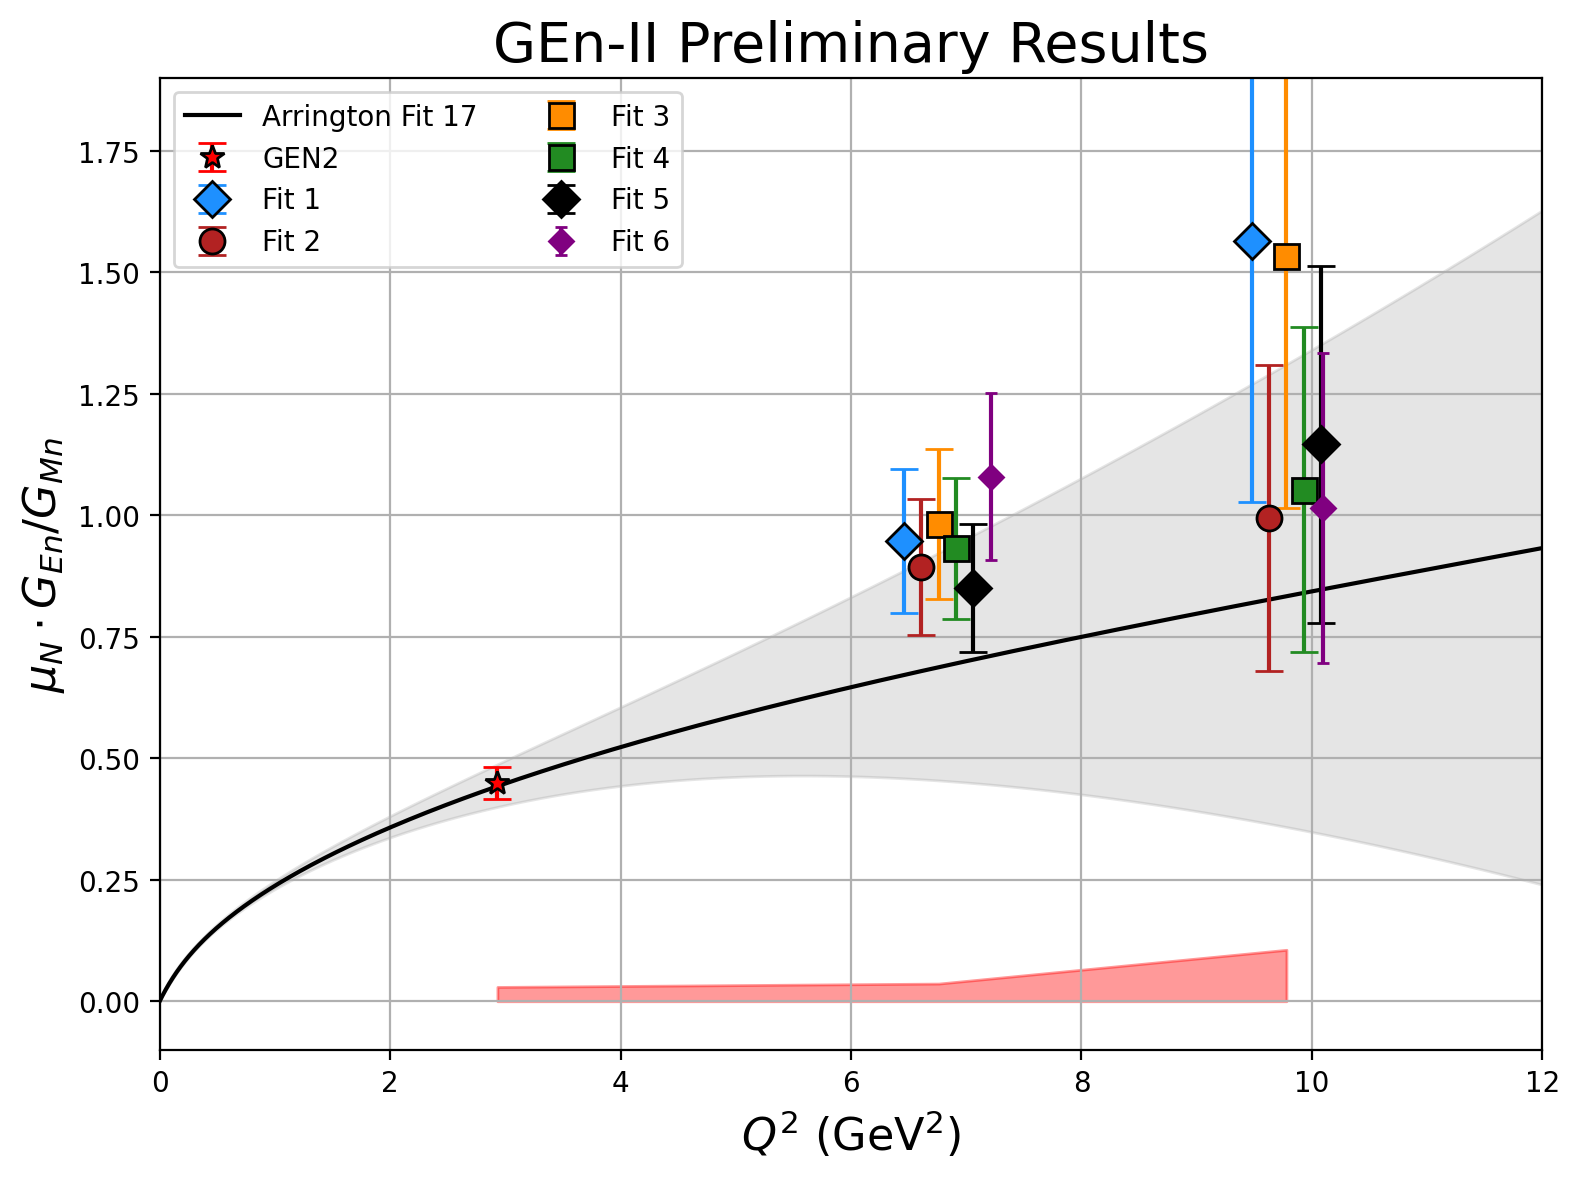

In [15]:
cap=5
mark=9
plt.figure(dpi=200,figsize=(8, 6))

colors = ['dodgerblue', 'firebrick', 'darkorange', 'forestgreen',
          'black', 'purple']
# Plot fit and shaded error band
plt.plot(Q2t, RatFit, color='black', label='Arrington Fit 17')

plt.fill_between(Q2t, RatFit - RatFitE, RatFit + RatFitE, color='gray', alpha=0.2)

plt.errorbar(GEN2["Q2"], GEN2["GE/GM * muN"], yerr=(GEN2["GE/GM_stat_error"]),
             fmt='*', color='red',capsize=cap,markeredgecolor='black',markersize=mark,label="GEN2")


plt.errorbar(GEN3Method1["Q2"]-.3, GEN3Method1["GE/GM * muN"],markeredgecolor='black',            
             yerr=(GEN3Method1["GE/GM_stat_error"]),label="Fit 1",
             fmt='D', color='dodgerblue',capsize=cap,markersize=mark)
plt.errorbar(GEN4Method1["Q2"]-.3, GEN4Method1["GE/GM * muN"],markeredgecolor='black',
             yerr=(GEN4Method1["GE/GM_stat_error"]),
             fmt='D', color='dodgerblue',capsize=cap,markersize=mark,alpha=1)


#plt.errorbar(GEN2Method2["Q2"]-.1, GEN2Method2["GE/GM * muN"], yerr=(GEN2Method2["GE/GM_stat_error"]),
#             fmt='o', color='blue',capsize=2,label="Method2")
plt.errorbar(GEN3Method2["Q2"]-.15, GEN3Method2["GE/GM * muN"],
             markeredgecolor='black',
             yerr=(GEN3Method2["GE/GM_stat_error"]),
             fmt='o', color=colors[1],capsize=cap,markersize=mark,label="Fit 2")
plt.errorbar(GEN4Method2["Q2"]-.15, GEN4Method2["GE/GM * muN"],markeredgecolor='black',
             yerr=(GEN4Method2["GE/GM_stat_error"]),
             fmt='o', color=colors[1],capsize=cap,markersize=mark,alpha=1)


#plt.errorbar(GEN2Method3["Q2"], GEN2Method3["GE/GM * muN"], yerr=(GEN2Method3["GE/GM_stat_error"]),
#             fmt='o', color='orange',capsize=2,label="Method3")
plt.errorbar(GEN3Method3["Q2"], GEN3Method3["GE/GM * muN"], yerr=(GEN3Method3["GE/GM_stat_error"]),
             fmt='s', color=colors[2],markeredgecolor='black',capsize=cap,markersize=mark,label="Fit 3")
plt.errorbar(GEN4Method3["Q2"], GEN4Method3["GE/GM * muN"], yerr=(GEN4Method3["GE/GM_stat_error"]),
             fmt='s', color=colors[2],markeredgecolor='black',capsize=cap,markersize=mark,alpha=1)


#plt.errorbar(GEN2Method4["Q2"]+.1, GEN2Method4["GE/GM * muN"], yerr=(GEN2Method4["GE/GM_stat_error"]),
#             fmt='o', color='green',capsize=2,label="Method4")
plt.errorbar(GEN3Method4["Q2"]+.15, GEN3Method4["GE/GM * muN"], yerr=(GEN3Method4["GE/GM_stat_error"]),
             fmt='s', color=colors[3],markeredgecolor='black',capsize=cap,markersize=mark,label="Fit 4")
plt.errorbar(GEN4Method4["Q2"]+.15, GEN4Method4["GE/GM * muN"], yerr=(GEN4Method4["GE/GM_stat_error"]),
             fmt='s', color=colors[3],markeredgecolor='black',capsize=cap,markersize=mark,alpha=1)


plt.errorbar(GEN3Method5["Q2"]+.3, GEN3Method5["GE/GM * muN"], yerr=(GEN3Method5["GE/GM_stat_error"]),
             fmt='D', color=colors[4],markeredgecolor='black',capsize=cap,markersize=mark,label="Fit 5")
plt.errorbar(GEN4Method5["Q2"]+.3, GEN4Method5["GE/GM * muN"], yerr=(GEN4Method5["GE/GM_stat_error"]),
             fmt='D', color=colors[4],markeredgecolor='black',capsize=cap,markersize=mark,alpha=1)


plt.errorbar(GEN3Method6["Q2"]+.45, GEN3Method6["GE/GM * muN"], yerr=(GEN3Method6["GE/GM_stat_error"]),
             fmt='D', color=colors[5],capsize=2)
plt.errorbar(GEN4Method6["Q2"]+.45, GEN4Method6["GE/GM * muN"], yerr=(GEN4Method6["GE/GM_stat_error"]),
             fmt='D', color=colors[5],capsize=2,alpha=1,label="Fit 6")
#plt.errorbar(GEN4["Q2"]+.4, Sk4, yerr=(Sk4stat),
#             fmt='o', color='black',capsize=2,label="Jeffas")

q_vals = np.array([
    GEN2["Q2"],
    GEN3["Q2"],
    GEN4["Q2"]
])
# Fill between ± half the systematic uncertainty

sys_errsM1 = np.array([
    GEN2Method1["GE/GM_sys_error"],
    GEN3Method1["GE/GM_sys_error"],
    GEN4Method1["GE/GM_sys_error"]
])
sys_errsM2 = np.array([
    GEN2Method2["GE/GM_sys_error"],
    GEN3Method2["GE/GM_sys_error"],
    GEN4Method2["GE/GM_sys_error"]
])
sys_errsM3 = np.array([
    GEN2Method3["GE/GM_sys_error"],
    GEN3Method3["GE/GM_sys_error"],
    GEN4Method3["GE/GM_sys_error"]
])
sys_errsM4 = np.array([
    GEN2Method4["GE/GM_sys_error"],
    GEN3Method4["GE/GM_sys_error"],
    GEN4Method4["GE/GM_sys_error"]
])


plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errsM3,
                 color='red', alpha=0.4)
"""plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errsM2,
                 color='blue', alpha=0.1)
plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errsM3,
                 color='orange', alpha=0.1)
plt.fill_between(q_vals,
                 central_vals ,
                 central_vals +   sys_errsM4,
                 color='green', alpha=0.1)"""
plt.xlim(0, 12)
plt.ylim(-0.1, 1.9)
plt.grid(True)
plt.xlabel('$Q^2$ (GeV$^2$)', fontsize=16)
plt.ylabel(r'$\mu_N \cdot G_{En} / G_{Mn}$', fontsize=16)
plt.title('GEn-II Preliminary Results', fontsize=20)
plt.legend(loc='upper left', fontsize=10, ncol=2)
#plt.yscale("log")
plt.tight_layout()

In [16]:
print(f'GEN2 Method 1: {GEN2Method1["GE/GM_stat_error"]}')
print(f'GEN2 Method 2: {GEN2Method2["GE/GM_stat_error"]}')
print(f'GEN2 Method 3: {GEN2Method3["GE/GM_stat_error"]}')
print(f'GEN2 Method 4: {GEN2Method4["GE/GM_stat_error"]}')
print('\n')
print(f'GEN3 Method 1: {GEN3Method1["GE/GM_stat_error"]}')
print(f'GEN3 Method 2: {GEN3Method2["GE/GM_stat_error"]}')
print(f'GEN3 Method 3: {GEN3Method3["GE/GM_stat_error"]}')
print(f'GEN3 Method 4: {GEN3Method4["GE/GM_stat_error"]}')
print(f'GEN3 Method 5: {GEN3Method5["GE/GM_stat_error"]}')
print('\n')

print(f'GEN4 Method 1: {GEN4Method1["GE/GM_stat_error"]}')
print(f'GEN4 Method 2: {GEN4Method2["GE/GM_stat_error"]}')
print(f'GEN4 Method 3: {GEN4Method3["GE/GM_stat_error"]}')
print(f'GEN4 Method 4: {GEN4Method4["GE/GM_stat_error"]}')
print(f'GEN4 Method 5: {GEN4Method5["GE/GM_stat_error"]}')


GEN2 Method 1: 0.0371
GEN2 Method 2: 0.0368
GEN2 Method 3: 0.0378
GEN2 Method 4: 0.0375


GEN3 Method 1: 0.1482
GEN3 Method 2: 0.1392
GEN3 Method 3: 0.1543
GEN3 Method 4: 0.1456
GEN3 Method 5: 0.1321


GEN4 Method 1: 0.5372
GEN4 Method 2: 0.3146
GEN4 Method 3: 0.5185
GEN4 Method 4: 0.3341
GEN4 Method 5: 0.3675


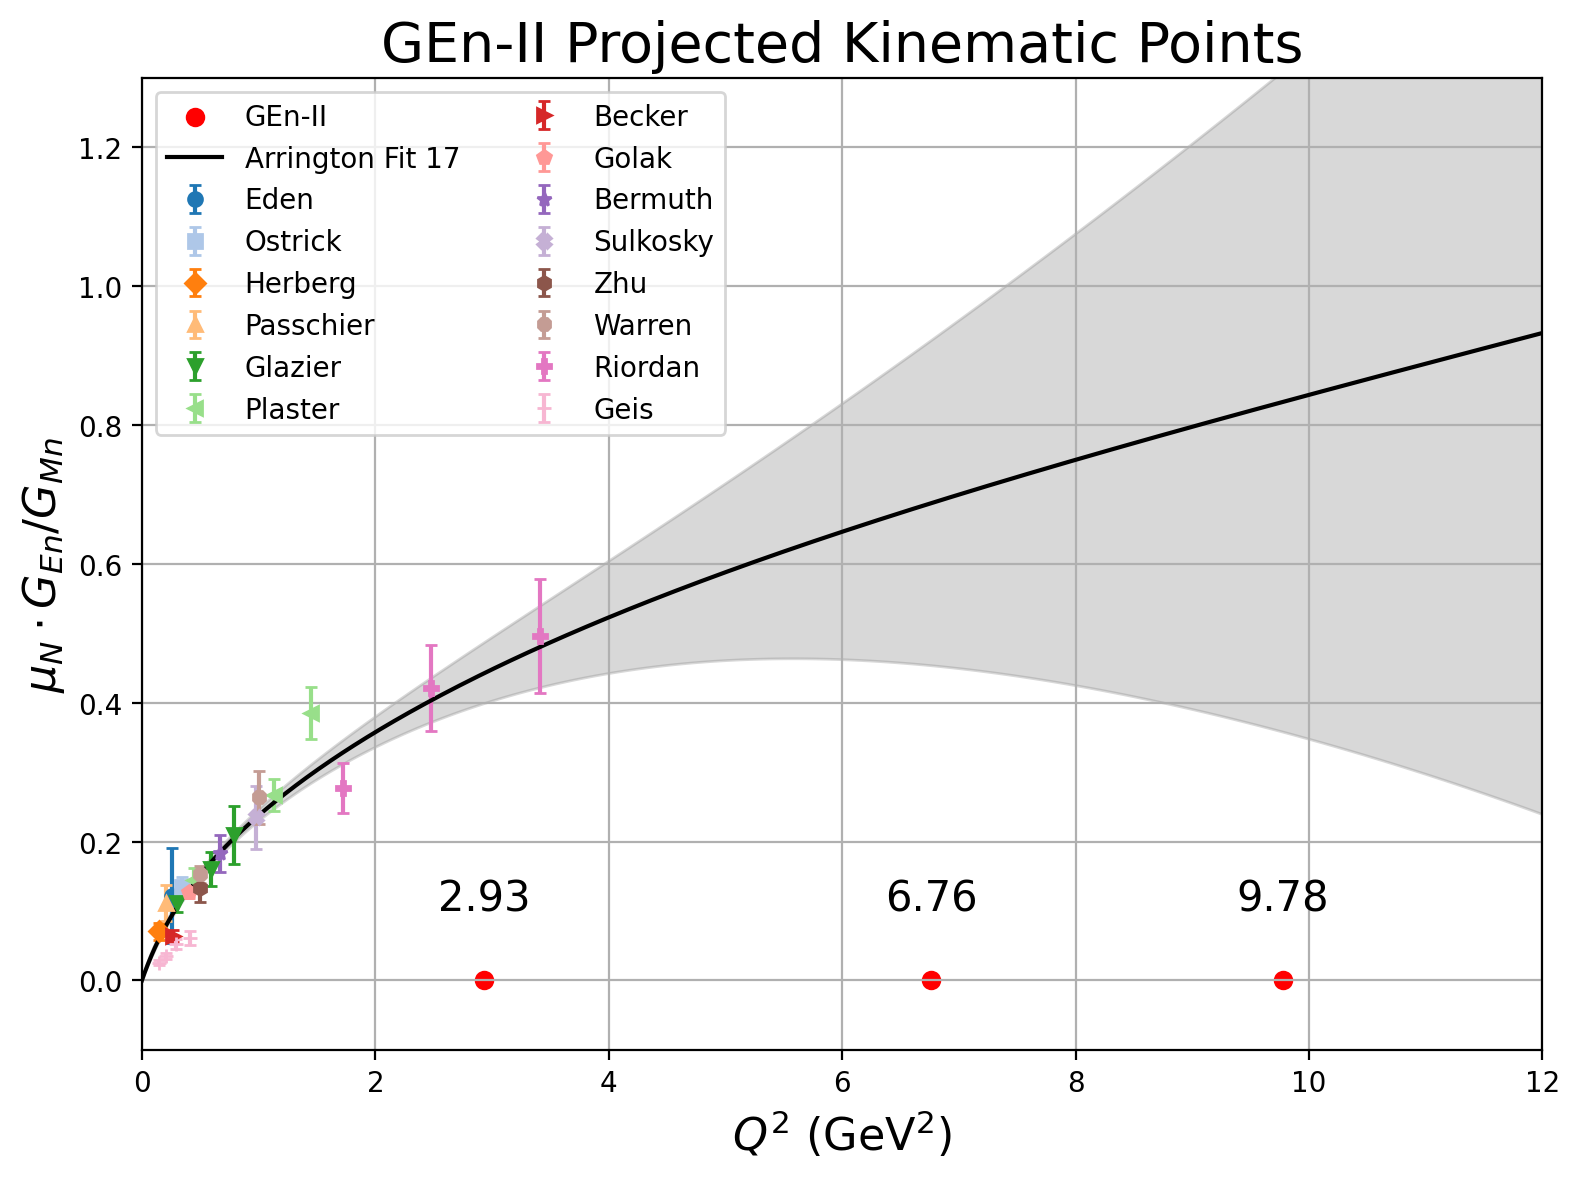

In [17]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
from matplotlib.cm import get_cmap
experiments = df["Experiment"].unique()

GENPROJ2=muN*np.array([-0.1770, 0.0319, 0.0222])
GENPROJ3=muN*np.array([-0.1918, 0.0259, 0.0253])
GENPROJ4=muN*np.array([-0.2098, 0.0380, 0.0161])
# Use a bright, qualitative colormap
cmap = get_cmap("tab20")  # or try "Set1" or "tab10"

colors = {exp: cmap(i % cmap.N) for i, exp in enumerate(experiments)}
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', '8', 'P', '+', 'x', '|', '_']
markers = {exp: marker_styles[i % len(marker_styles)] for i, exp in enumerate(experiments)}

# Plot world data with bright colors
for exp in experiments:
    subset = df[df["Experiment"] == exp]
    ax.errorbar(subset["Q2"], mu_n * subset["GEn"] / subset["GMn"],
                subset["RatE"], fmt=markers[exp], color=colors[exp],
                label=exp, markersize=5, capsize=2)

"""plt.errorbar(GEN2["Q2"], GENPROJ2[0], yerr=np.sqrt(GENPROJ2[1]**2+GENPROJ2[2]**2),
             fmt='o', color='red', label='GEn-II',capsize=2)
plt.errorbar(GEN3["Q2"], GENPROJ3[0], np.sqrt(GENPROJ3[1]**2+GENPROJ3[2]**2),
             fmt='o', color='red',capsize=2)
plt.errorbar(GEN4["Q2"], GENPROJ4[0], np.sqrt(GENPROJ4[1]**2+GENPROJ4[2]**2),
             fmt='o', color='red',capsize=2)"""
plt.scatter(GEN2["Q2"],0, color='red', label='GEn-II')
plt.scatter(GEN3["Q2"], 0, color='red')
plt.scatter(GEN4["Q2"], 0, color='red')

# Plot fit and shaded error band
ax.plot(Q2t, RatFit, color='black', label='Arrington Fit 17')
ax.fill_between(Q2t, RatFit - RatFitE, RatFit + RatFitE, color='gray', alpha=0.3)

# Watermark and labels


ax.set_xlim(0, 12)
ax.set_ylim(-0.1, 1.3)
ax.grid(True)
ax.set_xlabel('$Q^2$ (GeV$^2$)', fontsize=16)
ax.set_ylabel(r'$\mu_N \cdot G_{En} / G_{Mn}$', fontsize=16)
ax.set_title('GEn-II Projected Kinematic Points', fontsize=20)
ax.legend(loc='upper left', fontsize=10, ncol=2)
#plt.yscale("log")
plt.tight_layout()
plt.savefig("BlankResults.pdf")
plt.text(GEN2["Q2"],.1,str(np.round(GEN2["Q2"],2)),ha='center',fontsize='15')
plt.text(GEN3["Q2"],.1,str(np.round(GEN3["Q2"],2)),ha='center',fontsize='15')
plt.text(GEN4["Q2"],.1,str(np.round(GEN4["Q2"],2)),ha='center',fontsize='15')
plt.show()


<Figure size 1280x960 with 0 Axes>

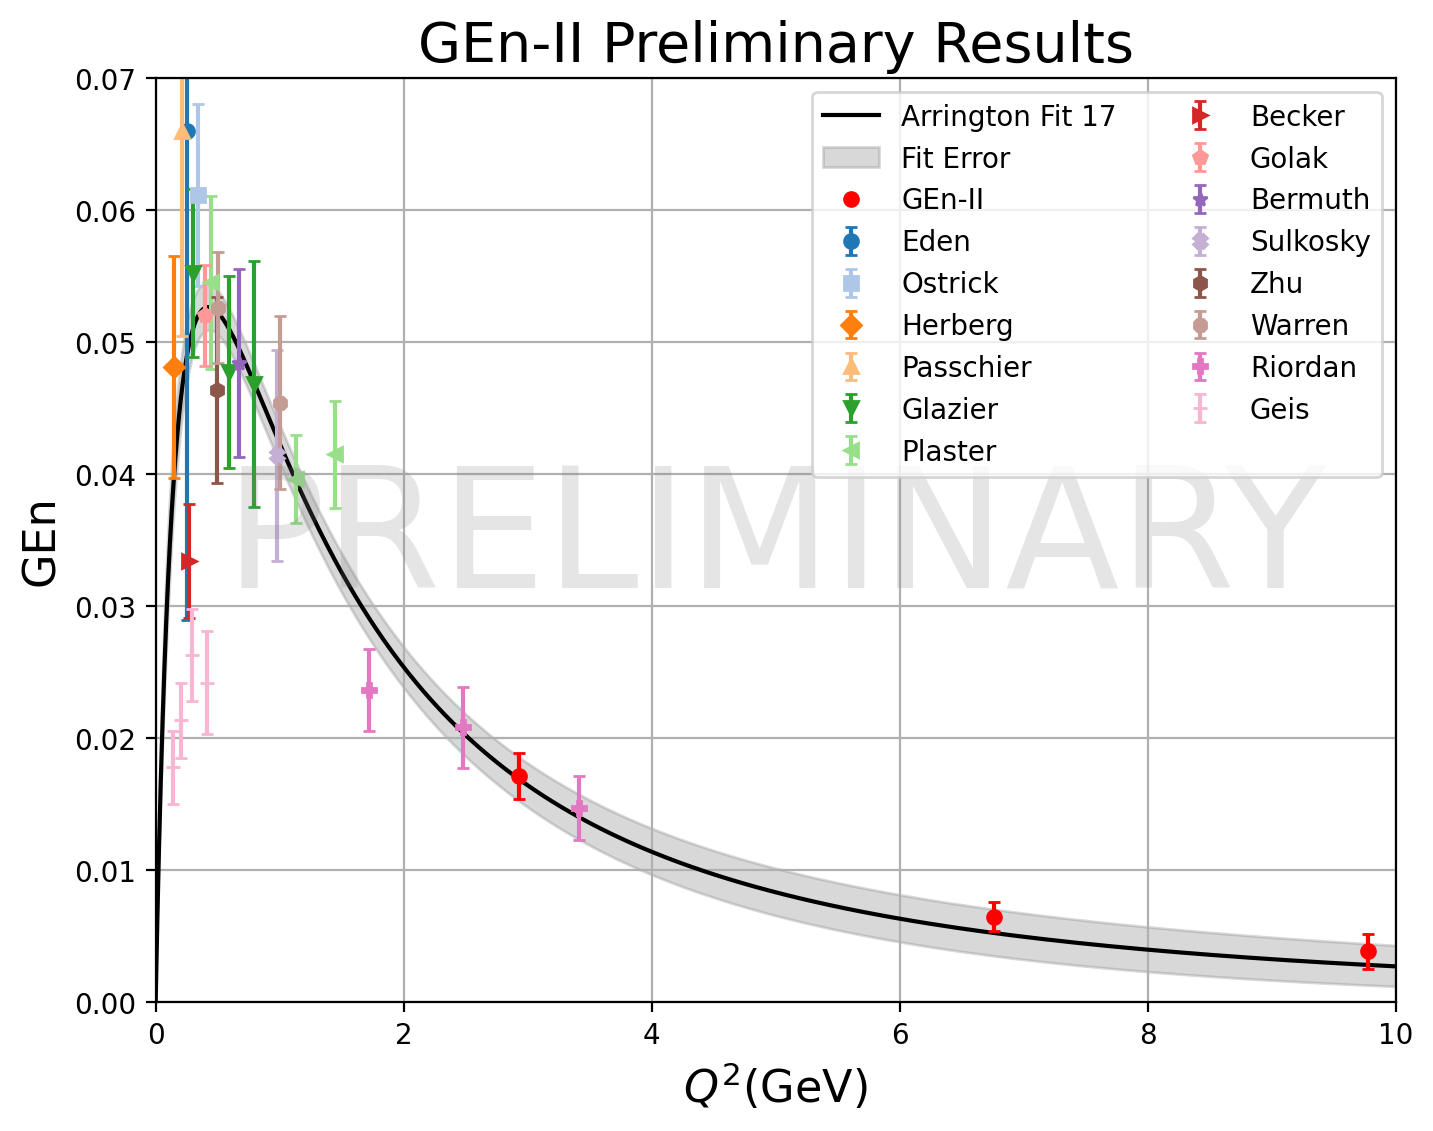

In [18]:

plt.figure(dpi=200)
gmnkin2=get_GMn_value(GEN2["Q2"])[0]*Dipole(GEN2["Q2"])

gmnkin3=get_GMn_value(GEN3["Q2"])[0]*Dipole(GEN3["Q2"])

gmnkin4=get_GMn_value(GEN4["Q2"])[0]*Dipole(GEN4["Q2"])
gmnkin2E=get_GMn_value(GEN2["Q2"])[1]*Dipole(GEN2["Q2"])

gmnkin3E=get_GMn_value(GEN3["Q2"])[1]*Dipole(GEN3["Q2"])

gmnkin4E=get_GMn_value(GEN4["Q2"])[1]*Dipole(GEN4["Q2"])

kin2FinalResult=GEN2["GE/GM * muN"]*gmnkin2
kin3FinalResult=GEN3Method5["GE/GM * muN"]*gmnkin3
kin4FinalResult=GEN4Method5["GE/GM * muN"]*gmnkin4

kin2FinalResultE=(GEN2["GE/GM_stat_error"]**2+GEN2["GE/GM_sys_error"]**2)**(1/2)*gmnkin2
kin3FinalResultE=(GEN3Method5["GE/GM_stat_error"]**2+GEN3Method5["GE/GM_sys_error"]**2)**(1/2)*gmnkin3
kin4FinalResultE=(GEN4Method5["GE/GM_stat_error"]**2+GEN4Method5["GE/GM_sys_error"]**2)**(1/2)*gmnkin4


A2 = GEN2["GE/GM * muN"]
sigma_A2 = (GEN2["GE/GM_stat_error"]**2 + GEN2["GE/GM_sys_error"]**2)**0.5

# GMn and its uncertainty
B2 = gmnkin2
sigma_B2 = gmnkin2E  # This is GMn uncertainty scaled by Dipole(Q2)

# Final GE error
kin2FinalResultE = ((B2 * sigma_A2)**2 + (A2 * sigma_B2)**2)**0.5
A3 = GEN3Method5["GE/GM * muN"]
sigma_A3 = (GEN3Method5["GE/GM_stat_error"]**2 + GEN3Method5["GE/GM_sys_error"]**2)**0.5
B3 = gmnkin3
sigma_B3 = gmnkin3E
kin3FinalResultE = ((B3 * sigma_A3)**2 + (A3 * sigma_B3)**2)**0.5

A4 = GEN4Method5["GE/GM * muN"]
sigma_A4 = (GEN4Method5["GE/GM_stat_error"]**2 + GEN4Method5["GE/GM_sys_error"]**2)**0.5
B4 = gmnkin4
sigma_B4 = gmnkin4E
kin4FinalResultE = ((B4 * sigma_A4)**2 + (A4 * sigma_B4)**2)**0.5





GETFF.Function_GETFF(3,Q2t[i])[0]

GEGD=np.empty(0)
GEGDE=np.empty(0)

GMGD=np.empty(0)
GMGDE=np.empty(0)

GEGDP=np.empty(0)
GEGDEP=np.empty(0)


for i in range(0,len(Q2t)):
    GEGD=np.append(GEGD,GETFF.Function_GETFF(3,Q2t[i])[0]*Dipole(Q2t[i]))
    GEGDE=np.append(GEGDE,GETFF.Function_GETFF(3,Q2t[i])[1]*Dipole(Q2t[i]))
    GEGDP=np.append(GEGDP,GETFF.Function_GETFF(1,Q2t[i])[0]*Dipole(Q2t[i]))
    GEGDEP=np.append(GEGDEP,GETFF.Function_GETFF(1,Q2t[i])[1]*Dipole(Q2t[i]))
    GMGD=np.append(GMGD,GETFF.Function_GETFF(4,Q2t[i])[0])
    GMGDE=np.append(GMGDE,GETFF.Function_GETFF(4,Q2t[i])[1])

len(GEGDE)

#Error Prop

def eprop(GE, GEE, GM, GMM):
    R = GE
    delta_R = GEE
    return R, delta_R

RatFit,RatFitE=eprop(GEGD,GEGDE,GMGD,GMGDE)

fig, ax = plt.subplots(figsize=(8, 6),dpi=200)
plt.plot(Q2t, RatFit, color='black',label='Arrington Fit 17')  # Plot the main line


# Calculate the upper and lower bounds of the shaded area
upper_bound = RatFit+RatFitE
lower_bound = RatFit-RatFitE

# Add shaded region


    
cmap = get_cmap("tab20")  # or try "Set1" or "tab10"

colors = {exp: cmap(i % cmap.N) for i, exp in enumerate(experiments)}
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', '8', 'P', '+', 'x', '|', '_']
markers = {exp: marker_styles[i % len(marker_styles)] for i, exp in enumerate(experiments)}
for exp in experiments:
    subset = df[df["Experiment"] == exp]
    ax.errorbar(subset["Q2"], subset["GEn"],
                (subset["stat"]**2+subset["sys"]**2)**(1/2), fmt=markers[exp], color=colors[exp],
                label=exp, markersize=5, capsize=2)


plt.fill_between(Q2t, lower_bound, upper_bound, color='gray', alpha=0.3,label='Fit Error')

plt.errorbar(GEN2["Q2"],kin2FinalResult,kin2FinalResultE,color='red',capsize=2)
plt.plot(GEN2["Q2"],kin2FinalResult,'.',color='red',markersize=10,label="GEn-II")

plt.errorbar(GEN3["Q2"],kin3FinalResult,kin3FinalResultE,color='red',capsize=2)
plt.plot(GEN3["Q2"],kin3FinalResult,'.',color='red',markersize=10)

plt.errorbar(GEN4["Q2"],kin4FinalResult,kin4FinalResultE,color='red',capsize=2)
plt.plot(GEN4["Q2"],kin4FinalResult,'.',color='red',markersize=10)
plt.text(0.5, 0.5, 'PRELIMINARY', fontsize=60, color='gray', ha='center', va='center',
         alpha=0.2, transform=plt.gca().transAxes)
plt.xlabel('$Q^2$(GeV)',fontsize=16)
plt.ylabel('GEn',fontsize=16)
plt.title('GEn-II Preliminary Results',fontsize=20)
#plt.savefig("PrelimResults.pdf")
# Set other plot properties
#plt.xscale('log')

plt.grid(True)
plt.legend(loc='upper right',ncol=2)
plt.ylim(0,.07)
plt.xlim(0,10)
plt.show()

In [19]:
# KIN2
A2 = GEN2["GE/GM * muN"]
A2_stat = GEN2["GE/GM_stat_error"]
A2_sys = GEN2["GE/GM_sys_error"]
B2 = gmnkin2
sigma_B2 = gmnkin2E

gen2 = A2 * B2
gen2_stat = B2 * A2_stat
gen2_sys  = B2 * A2_sys
gen2_gmn  = A2 * sigma_B2
gen2_total = (gen2_stat**2 + gen2_sys**2 + gen2_gmn**2)**0.5

# KIN3
A3 = GEN3Method5["GE/GM * muN"]
A3_stat = GEN3Method5["GE/GM_stat_error"]
A3_sys = GEN3Method5["GE/GM_sys_error"]
B3 = gmnkin3
sigma_B3 = gmnkin3E

gen3 = A3 * B3
gen3_stat = B3 * A3_stat
gen3_sys  = B3 * A3_sys
gen3_gmn  = A3 * sigma_B3
gen3_total = (gen3_stat**2 + gen3_sys**2 + gen3_gmn**2)**0.5

# KIN4
A4 = GEN4Method5["GE/GM * muN"]
A4_stat = GEN4Method5["GE/GM_stat_error"]
A4_sys = GEN4Method5["GE/GM_sys_error"]
B4 = gmnkin4
sigma_B4 = gmnkin4E

gen4 = A4 * B4
gen4_stat = B4 * A4_stat
gen4_sys  = B4 * A4_sys
gen4_gmn  = A4 * sigma_B4
gen4_total = (gen4_stat**2 + gen4_sys**2 + gen4_gmn**2)**0.5

gen = [gen2, gen3, gen4]
gen_stat = [gen2_stat, gen3_stat, gen4_stat]
gen_sys = [gen2_sys, gen3_sys, gen4_sys]

In [20]:
gmn = muN*np.array([gmnkin2, gmnkin3, gmnkin4])
gmn_err = muN*np.array([gmnkin2E, gmnkin3E, gmnkin4E])

In [21]:
print(gmn)
print(gmn_err)

[-0.07297513 -0.01451597 -0.00642032]
[-0.00071519 -0.00061533 -0.0007373 ]


In [22]:
print(gen)
print(gen_stat)
print(gen_sys)

[0.01710128012129018, 0.006452892987860759, 0.0038461516562850627]
[0.001258849529338782, 0.001002383776689095, 0.001233386329567854]
[0.001178740922926314, 0.0002837937414698876, 0.00023224580681930747]


In [23]:
GEntheory = np.transpose(np.loadtxt('../DB/neutron_lookup.dat'))
Q2t = np.sort(GEntheory[0])

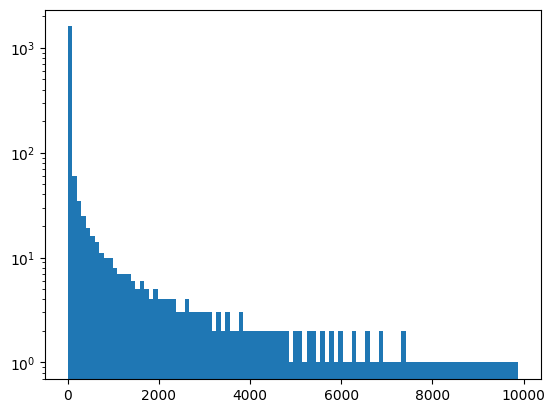

In [24]:
d=plt.hist(Q2t,bins=100)
plt.yscale("log")

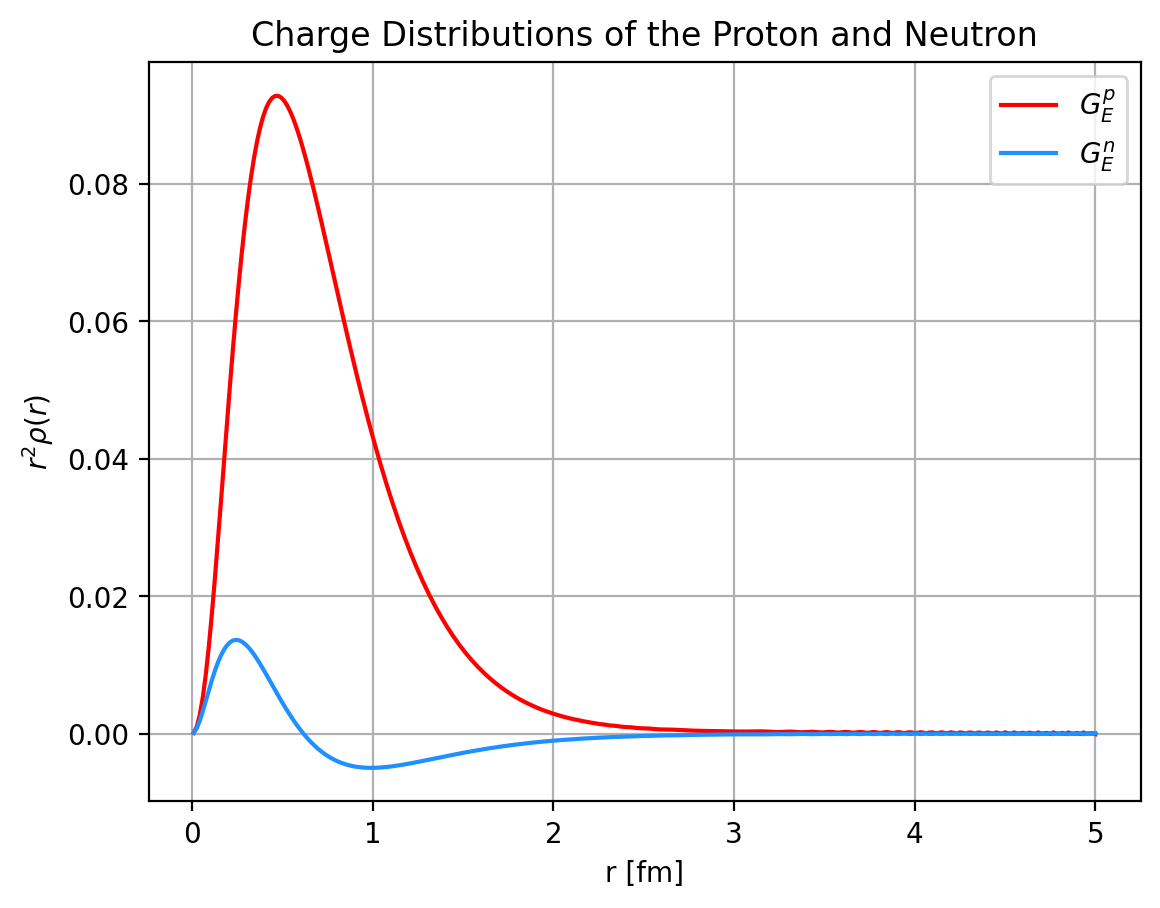

In [25]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import simps
GEGD=np.empty(0)
GEGDE=np.empty(0)

GMGD=np.empty(0)
GMGDE=np.empty(0)

GEGDP=np.empty(0)
GEGDEP=np.empty(0)

for i in range(0,len(Q2t)):
    GEGD=np.append(GEGD,GETFF.Function_GETFF(3,Q2t[i])[0]*Dipole(Q2t[i]))
    GEGDE=np.append(GEGDE,GETFF.Function_GETFF(3,Q2t[i])[1]*Dipole(Q2t[i]))
    GEGDP=np.append(GEGDP,GETFF.Function_GETFF(1,Q2t[i])[0]*Dipole(Q2t[i]))
    GEGDEP=np.append(GEGDEP,GETFF.Function_GETFF(1,Q2t[i])[1]*Dipole(Q2t[i]))

def dipole(Q2):
    return (1 + Q2 / 0.71)**-2
def compute_rho_r(GE_q2_vals, q2_vals, r_vals):
    q_vals = np.sqrt(q2_vals)
    GE_interp = interp1d(q_vals, GE_q2_vals, kind='cubic', fill_value=0, bounds_error=False)
    factor = 1 / (2 * np.pi**2)
    rho_vals = []
    
    hbarc = 0.1973269804  # GeV·fm

    for r in r_vals:
        q_sample = q_vals/hbarc
        GE_sample = GE_q2_vals
        qr = q_sample * r 
        integrand = GE_sample * np.sin(qr) / (qr + 1e-12) * q_sample**2
        rho = factor * simps(integrand, q_sample)
        rho_vals.append(rho)

    return np.array(rho_vals)



r_vals = np.linspace(0.01, 5, 300)  # r in fm
GE_vals = (1 + Q2t / 0.71)**-2
rho_test = compute_rho_r(GE_vals, Q2t, r_vals)
rho = compute_rho_r(GEGD, Q2t, r_vals)
rhop = compute_rho_r(GEGDP, Q2t, r_vals)
plt.figure(dpi=200)
plt.plot(r_vals, r_vals**2 * rhop,color='red',label=r'$G^p_E$')
plt.plot(r_vals, r_vals**2 * rho,color='dodgerblue',label=r'$G^n_E$')
plt.xlabel("r [fm]")
plt.ylabel(r"$r^2 \rho(r)$")
plt.title("Charge Distributions of the Proton and Neutron")
plt.grid()
plt.legend(loc='upper right')
plt.show()


In [26]:
print("G_E^p(Q²=0) =", GETFF.Function_GETFF(1, 0.0001)[0])
print("G_E^n(Q²=0) =", GETFF.Function_GETFF(3, 0.0001)[0])


G_E^p(Q²=0) = 0.9999510459563146
G_E^n(Q²=0) = 4.967177987497464e-05


In [56]:
print("Q2t min:", Q2t.min(), "Q2t max:", Q2t.max())
print("q_max (GeV):", np.sqrt(Q2t.max()))
print("r_min resolution (fm):", 1 / np.sqrt(Q2t.max()))


Q2t min: 1e-06 Q2t max: 9885.531
q_max (GeV): 99.42600766399102
r_min resolution (fm): 0.010057730602836714


In [61]:
# Normalize rho to total charge = 1
norm = simps(4 * np.pi * r_vals**2 * rho_test, r_vals)
rho_norm = rho_test / norm

# Compute ⟨r²⟩
r_squared_avg = simps(4 * np.pi * r_vals**4 * rho_norm, r_vals)
r_rms = np.sqrt(r_squared_avg)
print(f"Proton RMS radius: {r_rms:.3f} fm")


Proton RMS radius: 0.812 fm


In [60]:
total_charge = simps(4 * np.pi * r_vals**2 * rho_test, r_vals)
print("Total integrated charge (should be 1):", total_charge)


Total integrated charge (should be 1): 1.0000717581014207


In [64]:
np.max(q_vals)

9.7788

In [ ]:
q2_vals = np.linspace(0, 10, 1000)
GE_vals = dipole(q2_vals)

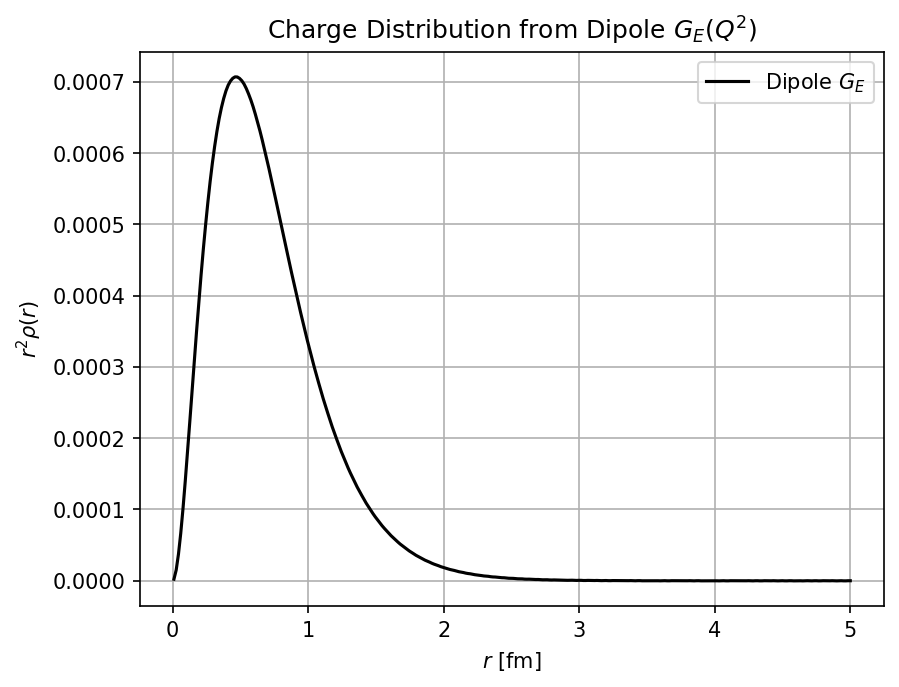

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Dipole Form Factor as a function of Q²
def dipole_G(Q2):
    return (1 + Q2 / 0.71)**-2

# Compute ρ(r) using the proper 3D Fourier transform of G_E(Q)
def compute_rho_dipole(r_vals, Qmax=20.0, Nq=5000):
    """
    Parameters:
    - r_vals: array of r (in fm)
    - Qmax: upper limit for Q integration in GeV
    - Nq: number of Q samples

    Returns:
    - rho_vals: ρ(r) for each r in r_vals
    """
    hbarc = 0.1973269804  # GeV·fm
    q_vals = np.linspace(0.001, Qmax, Nq)  # Avoid division by zero at Q=0
    Q2_vals = q_vals**2
    GE_vals = dipole_G(Q2_vals)

    rho_vals = []
    factor = 1 / (2 * np.pi**2)

    for r in r_vals:
        hbarc = 0.1973269804  # GeV·fm
        qr = q_vals * r / hbarc  # Now dimensionless!

        integrand = GE_vals * np.sin(qr) / (qr + 1e-12) * q_vals**2
        rho = factor * simps(integrand, q_vals)
        rho_vals.append(rho)

    return np.array(rho_vals)

# Range of r values (in fm)
r_vals = np.linspace(0.01, 5, 300)

# Compute charge density ρ(r) from dipole G_E
rho_vals = compute_rho_dipole(r_vals)

# Plot r²·ρ(r)
plt.figure(dpi=150)
plt.plot(r_vals, r_vals**2 * rho_vals, color='black', label='Dipole $G_E$')
plt.xlabel(r'$r$ [fm]')
plt.ylabel(r'$r^2 \rho(r)$')
plt.title("Charge Distribution from Dipole $G_E(Q^2)$")
plt.grid()
plt.legend()
plt.show()
